## Dataset Analysis and Pre-Processing

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
dataset = pd.read_csv("pediatric_appendicitis.csv", delimiter=';')
updated_dataset = pd.DataFrame(dataset)
updated_dataset = updated_dataset.loc[:, ~updated_dataset.columns.str.startswith('Unnamed')]
updated_dataset.describe()

,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_Diameter,Body_Temperature,WBC_Count,Neutrophil_Percentage,Segmented_Neutrophils,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,CRP,US_Number
count,781.000000,755.000000,756.000000,779.000000,778.000000,730.000000,730.000000,498.000000,775.000000,776.000000,679.000000,54.000000,764.000000,764.000000,756.000000,764.000000,771.000000,760.000000
mean,11.346451,18.907012,148.017460,43.172542,4.284062,5.921918,5.253425,7.762651,37.404516,12.670683,71.791163,64.929630,4.799490,13.380497,13.180291,285.252618,31.386900,425.515789
std,3.529909,4.385331,19.732016,17.390984,2.574057,2.155972,1.958456,2.536671,0.903678,5.366525,14.463656,15.085025,0.499012,1.393271,4.538774,72.494373,57.433854,271.585211
min,0.000000,7.830000,53.000000,3.960000,1.000000,0.000000,0.000000,2.700000,26.900000,2.600000,27.200000,32.000000,3.620000,8.200000,11.200000,91.000000,0.000000,1.000000
25%,9.200000,15.725000,137.000000,29.500000,3.000000,4.000000,4.000000,6.000000,36.800000,8.200000,61.400000,54.500000,4.537500,12.600000,12.300000,236.000000,1.000000,198.750000
50%,11.440000,18.060000,149.650000,41.400000,3.000000,6.000000,5.000000,7.500000,37.200000,12.000000,75.500000,64.500000,4.780000,13.300000,12.700000,276.000000,7.000000,398.500000
75%,14.100000,21.180000,163.000000,54.000000,5.000000,8.000000,7.000000,9.100000,37.900000,16.200000,83.600000,77.500000,5.020000,14.000000,13.300000,330.000000,33.000000,613.250000
max,18.360000,38.160000,192.000000,103.000000,28.000000,10.000000,10.000000,17.000000,40.200000,37.700000,97.700000,91.000000,14.000000,36.000000,86.900000,708.000000,365.000000,992.000000


In [11]:
updated_dataset.head()

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,Appendix_Diameter,Migratory_Pain,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Coughing_Pain,Nausea,Loss_of_Appetite,Body_Temperature,WBC_Count,Neutrophil_Percentage,Segmented_Neutrophils,Neutrophilia,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,Ketones_in_Urine,RBC_in_Urine,WBC_in_Urine,CRP,Dysuria,Stool,Peritonitis,Psoas_Sign,Ipsilateral_Rebound_Tenderness,US_Performed,US_Number,Free_Fluids,Appendix_Wall_Layers,Target_Sign,Appendicolith,Perfusion,Perforation,Surrounding_Tissue_Reaction,Appendicular_Abscess,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.68,16.9,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,4.0,3.0,yes,7.1,no,yes,yes,no,no,yes,37.0,7.7,68.2,NaN,no,5.27,14.8,12.2,254.0,++,+,no,0.0,no,normal,no,yes,no,yes,882.0,no,intact,NaN,suspected,NaN,no,yes,no,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,5.0,4.0,no,NaN,yes,yes,yes,no,no,yes,36.9,8.1,64.8,NaN,no,5.26,15.7,12.7,151.0,no,no,no,3.0,yes,normal,no,yes,no,yes,883.0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.14,23.3,female,163.0,62.0,4.0,conservative,uncomplicated,appendicitis,no appendicitis,5.0,3.0,no,NaN,no,yes,yes,no,no,no,36.6,13.2,74.8,NaN,no,3.98,11.4,12.2,300.0,no,no,no,3.0,no,constipation,no,yes,no,yes,884.0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.37,20.6,female,165.0,56.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,7.0,6.0,no,NaN,yes,yes,no,no,yes,yes,36.0,11.4,63.0,NaN,no,4.64,13.6,13.2,258.0,no,no,no,0.0,yes,normal,no,yes,no,yes,886.0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.08,16.9,female,163.0,45.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,5.0,6.0,yes,7.0,no,yes,yes,yes,yes,yes,36.9,8.1,44.0,NaN,no,4.44,12.6,13.6,311.0,no,no,no,0.0,no,constipation,no,yes,no,yes,887.0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN


Text(0, 0.5, 'Frequency')

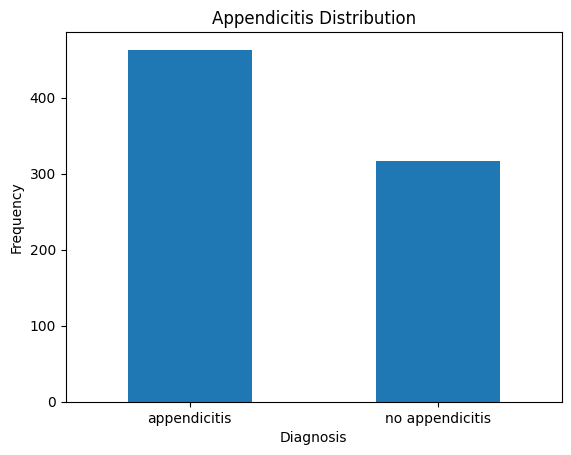

In [12]:
appendicitis_counter = pd.value_counts(updated_dataset['Diagnosis'], sort = True)

appendicitis_counter.plot(kind = 'bar', rot=0)

plt.title("Appendicitis Distribution")

LABELS = ["appendicitis", "no appendicitis"]

plt.xticks(range(2), LABELS)

plt.xlabel("Diagnosis")

plt.ylabel("Frequency")

In [13]:
#erase all output columns except the diagnosis one
updated_dataset.drop('Severity', axis=1, inplace=True)
updated_dataset.drop('Management', axis=1, inplace=True)
updated_dataset.drop('Diagnosis_Presumptive', axis=1, inplace=True)

In [14]:
#if having <NA> and NaN causes problems, just remove the astype("Int64") conversions

#binarization
#Peritonitis
mapping = {"no" : 0, "local" : 1, "generalized" : 2}
updated_dataset["Peritonitis"] = updated_dataset["Peritonitis"].replace(mapping).astype("Int64")
one_hot = pd.get_dummies(updated_dataset['Peritonitis'], prefix='Peritonitis', dtype=int)
#updated_dataset.drop('Peritonitis', axis=1, inplace=True)
updated_dataset = pd.concat([updated_dataset, one_hot], axis=1)


#Stool
dummies = pd.get_dummies(updated_dataset['Stool'], prefix='Stool', dtype=int)
updated_dataset = pd.concat([updated_dataset, dummies], axis=1)
updated_dataset.drop('Stool', axis=1, inplace=True)

#Ketones_in_Urine
mapping = {"no" : 0, '+' : 1, "++" : 2, "+++": 3}
updated_dataset["Ketones_in_Urine"] = updated_dataset["Ketones_in_Urine"].replace(mapping).astype("Int64")
one_hot = pd.get_dummies(updated_dataset['Ketones_in_Urine'], prefix='Ketones_in_Urine', dtype=int)
#updated_dataset.drop('Ketones_in_Urine', axis=1, inplace=True)
updated_dataset = pd.concat([updated_dataset, one_hot], axis=1)


#RBC_in_Urine
mapping = {"no" : 0, '+' : 1, "++" : 2, "+++": 3}
updated_dataset["RBC_in_Urine"] = updated_dataset["RBC_in_Urine"].replace(mapping).astype("Int64")
one_hot = pd.get_dummies(updated_dataset['RBC_in_Urine'], prefix='RBC_in_Urine', dtype=int)
#updated_dataset.drop('RBC_in_Urine', axis=1, inplace=True)
updated_dataset = pd.concat([updated_dataset, one_hot], axis=1)


#WBC_in_Urine
mapping = {"no" : 0, '+' : 1, "++" : 2, "+++": 3}
updated_dataset["WBC_in_Urine"] = updated_dataset["WBC_in_Urine"].replace(mapping).astype("Int64")
one_hot = pd.get_dummies(updated_dataset['WBC_in_Urine'], prefix='WBC_in_Urine', dtype=int)
#updated_dataset.drop('WBC_in_Urine', axis=1, inplace=True)
updated_dataset = pd.concat([updated_dataset, one_hot], axis=1)


#Perfusion- don't know if it should be ordinal encoding or one-hot encoding
dummies = pd.get_dummies(updated_dataset['Perfusion'], prefix='Perfusion', dtype=int)
updated_dataset = pd.concat([updated_dataset, dummies], axis=1)
updated_dataset.drop('Perfusion', axis=1, inplace=True)


#Appendix_Wall_Layers
dummies = pd.get_dummies(updated_dataset['Appendix_Wall_Layers'], prefix='Appendix_Wall_Layers', dtype=int)
updated_dataset = pd.concat([updated_dataset, dummies], axis=1)
updated_dataset.drop('Appendix_Wall_Layers', axis=1, inplace=True)


#Appendicolith
dummies = pd.get_dummies(updated_dataset['Appendicolith'], prefix='Appendicolith', dtype=int)
updated_dataset = pd.concat([updated_dataset, dummies], axis=1)
updated_dataset.drop('Appendicolith', axis=1, inplace=True)


#Perforation
dummies = pd.get_dummies(updated_dataset['Perforation'], prefix='Perforation', dtype=int)
updated_dataset = pd.concat([updated_dataset, dummies], axis=1)
updated_dataset.drop('Perforation', axis=1, inplace=True)


#Appendicular_Abscess
dummies = pd.get_dummies(updated_dataset['Appendicular_Abscess'], prefix='Appendicular_Abscess', dtype=int)
updated_dataset = pd.concat([updated_dataset, dummies], axis=1)
updated_dataset.drop('Appendicular_Abscess', axis=1, inplace=True)


#translating binary yes/no values to 1/0 numeric values| sex, diagnosis
binary_columns = updated_dataset.select_dtypes(include=['object']).columns
binary_columns = [col for col in binary_columns if updated_dataset[col].nunique() == 2]
for column in binary_columns:
    if column == "Sex":
        mapping = {"male" : 1, "female" : 0} 
        updated_dataset["Sex"] = updated_dataset["Sex"].replace(mapping).astype("Int64")
    elif column == "Diagnosis":
        mapping = {"appendicitis" : 1, "no appendicitis" : 0} 
        updated_dataset["Diagnosis"] = updated_dataset["Diagnosis"].replace(mapping).astype("Int64")
    else:
        mapping = {"yes" : 1, "no" : 0}
        updated_dataset[column] = updated_dataset[column].replace(mapping).astype("Int64")


pd.set_option('display.max_columns', None)
updated_dataset = updated_dataset.sort_index(axis=1)
updated_dataset.head(10)

,Abscess_Location,Age,Alvarado_Score,Appendicolith_no,Appendicolith_suspected,Appendicolith_yes,Appendicular_Abscess_no,Appendicular_Abscess_suspected,Appendicular_Abscess_yes,Appendix_Diameter,Appendix_Wall_Layers_intact,Appendix_Wall_Layers_partially raised,Appendix_Wall_Layers_raised,Appendix_Wall_Layers_upset,Appendix_on_US,BMI,Body_Temperature,Bowel_Wall_Thickening,CRP,Conglomerate_of_Bowel_Loops,Contralateral_Rebound_Tenderness,Coprostasis,Coughing_Pain,Diagnosis,Dysuria,Enteritis,Free_Fluids,Gynecological_Findings,Height,Hemoglobin,Ileus,Ipsilateral_Rebound_Tenderness,Ketones_in_Urine,Ketones_in_Urine_0,Ketones_in_Urine_1,Ketones_in_Urine_2,Ketones_in_Urine_3,Length_of_Stay,Loss_of_Appetite,Lower_Right_Abd_Pain,Lymph_Nodes_Location,Meteorism,Migratory_Pain,Nausea,Neutrophil_Percentage,Neutrophilia,Paedriatic_Appendicitis_Score,Pathological_Lymph_Nodes,Perforation_no,Perforation_not excluded,Perforation_suspected,Perforation_yes,Perfusion_hyperperfused,Perfusion_hypoperfused,Perfusion_no,Perfusion_present,Peritonitis,Peritonitis_0,Peritonitis_1,Peritonitis_2,Psoas_Sign,RBC_Count,RBC_in_Urine,RBC_in_Urine_0,RBC_in_Urine_1,RBC_in_Urine_2,RBC_in_Urine_3,RDW,Segmented_Neutrophils,Sex,Stool_constipation,"Stool_constipation, diarrhea",Stool_diarrhea,Stool_normal,Surrounding_Tissue_Reaction,Target_Sign,Thrombocyte_Count,US_Number,US_Performed,WBC_Count,WBC_in_Urine,WBC_in_Urine_0,WBC_in_Urine_1,WBC_in_Urine_2,WBC_in_Urine_3,Weight
0,NaN,12.68,4.0,0,1,0,1,0,0,7.1,1,0,0,0,1,16.9,37.0,<NA>,0.0,<NA>,1,<NA>,0,1,0,<NA>,0,NaN,148.0,14.8,<NA>,0,2,0,0,1,0,3.0,1,1,reUB,<NA>,0,0,68.2,0,3.0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,5.27,1,0,1,0,0,12.2,NaN,0,0,0,0,1,1,<NA>,254.0,882.0,1,7.7,0,1,0,0,0,37.0
1,NaN,14.10,5.0,0,0,0,0,0,0,NaN,0,0,0,0,0,31.9,36.9,<NA>,3.0,<NA>,1,<NA>,0,0,1,<NA>,0,NaN,147.0,15.7,<NA>,0,0,1,0,0,0,2.0,1,1,NaN,1,1,0,64.8,0,4.0,<NA>,0,0,0,0,0,0,0,0,0,1,0,0,1,5.26,0,1,0,0,0,12.7,NaN,1,0,0,0,1,<NA>,<NA>,151.0,883.0,1,8.1,0,1,0,0,0,69.5
2,NaN,14.14,5.0,0,0,0,0,0,0,NaN,0,0,0,0,0,23.3,36.6,<NA>,3.0,<NA>,1,<NA>,0,0,0,1,0,NaN,163.0,11.4,<NA>,0,0,1,0,0,0,4.0,0,1,NaN,1,0,0,74.8,0,3.0,<NA>,0,0,0,0,0,0,0,0,0,1,0,0,1,3.98,0,1,0,0,0,12.2,NaN,0,1,0,0,0,<NA>,<NA>,300.0,884.0,1,13.2,0,1,0,0,0,62.0
3,NaN,16.37,7.0,0,0,0,0,0,0,NaN,0,0,0,0,0,20.6,36.0,<NA>,0.0,<NA>,0,<NA>,0,0,1,1,0,NaN,165.0,13.6,<NA>,0,0,1,0,0,0,3.0,1,1,reUB,<NA>,1,1,63.0,0,6.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,4.64,0,1,0,0,0,13.2,NaN,0,0,0,0,1,<NA>,<NA>,258.0,886.0,1,11.4,0,1,0,0,0,56.0
4,NaN,11.08,5.0,0,0,0,0,0,0,7.0,0,0,0,0,1,16.9,36.9,<NA>,0.0,<NA>,1,<NA>,1,1,0,1,0,NaN,163.0,12.6,<NA>,0,0,1,0,0,0,3.0,1,1,reUB,<NA>,0,1,44.0,0,6.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,4.44,0,1,0,0,0,13.6,NaN,0,1,0,0,0,<NA>,<NA>,311.0,887.0,1,8.1,0,1,0,0,0,45.0
5,NaN,11.05,6.0,0,0,0,0,0,0,NaN,0,0,0,0,0,30.7,36.9,<NA>,63.0,<NA>,1,<NA>,1,0,0,<NA>,0,NaN,121.0,12.5,<NA>,0,2,0,0,1,0,3.0,1,1,NaN,<NA>,1,1,71.4,0,7.0,<NA>,0,0,0,0,0,0,0,0,0,1,0,0,1,4.96,0,1,0,0,0,13.3,NaN,1,0,0,1,0,<NA>,<NA>,249.0,888.0,1,9.5,0,1,0,0,0,45.0
6,NaN,8.98,5.0,0,0,0,0,0,0,NaN,0,0,0,0,0,19.4,36.7,<NA>,9.0,<NA>,1,<NA>,1,0,0,<NA>,0,NaN,140.0,12.7,<NA>,0,0,1,0,0,0,3.0,1,1,NaN,<NA>,0,1,69.1,0,6.0,<NA>,0,0,0,0,0,0,0,0,0,1,0,0,1,4.77,0,1,0,0,0,12.6,NaN,0,0,0,0,1,<NA>,<NA>,337.0,889.0,1,10.0,1,0,1,0,0,38.5
7,NaN,7.06,3.0,0,0,0,0,0,0,NaN,0,0,0,0,0,NaN,36.8,0,0.0,<NA>,0,<NA>,0,0,0,<NA>,0,NaN,NaN,12.0,<NA>,0,<NA>,0,0,0,0,2.0,1,0,re UB,<NA>,0,1,79.6,1,3.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,4.89,<NA>,0,0,0,0,13.9,NaN,0,0,0,0,1,<NA>,<NA>,412.0,890.0,1,8.0,<NA>,0,0,0,0,21.5
8,NaN,7.90,7.0,0,0,0,0,0,0,3.7,0,0,0,0,1,15.7,37.3,<NA>,20.0,<NA>,0,<NA>,0,0,0,<NA>,1,NaN,131.0,13.4,<NA>,0,3,0,0,0,1,3.0,1,1,NaN,1,0,0,76.0,1,6.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,4.61,1,0,1,0,0,12.0,NaN,1,0,0,0,1,<NA>,<NA>,350.0,891.0,1,20.9,0,1,0,0,0,26.7
9,NaN,14.34,4.0,0,0,0,0,0,0,8.0,1,0,0,0,1,14.9,37.1,<NA>,0.0,<NA>,0,<NA>,0,1,0,<NA>,0,NaN,174.0,12.9,<NA>,0,0,1,0,0,0,3.0,1,1,NaN,<NA>,0,1,47.2,0,4.0,<NA>,0,0,0,0,0,0,0,0,0,1,0,0,0,4.78,0,1,0,0,0,12.6,NaN,1,0,0,0,1,1,<NA>,220.0,893.0,1,5.8,0,1,0,0,0

In [15]:
#Detecting outliers in continuous 
#Detecting outliers in discrete

In [16]:
updated_dataset.isna().sum()

Abscess_Location           769
Age                          1
Alvarado_Score              52
Appendicolith_no             0
Appendicolith_suspected      0
                          ... 
WBC_in_Urine_0               0
WBC_in_Urine_1               0
WBC_in_Urine_2               0
WBC_in_Urine_3               0
Weight                       3
Length: 86, dtype: int64